In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import numpy as np

In [2]:
df = pd.read_csv('Market_Basket_Optimisation.csv')
print("Dataset shape:", df.shape)
print(df.info())

Dataset shape: (7500, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16

In [4]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
transactions = []
for i in range(len(df)):
    row_items = df.iloc[i].tolist()
    row_items = [str(item) for item in row_items if pd.notnull(item)]
    transactions.append(row_items)
print("First transaction:", transactions[0])

First transaction: ['burgers', 'meatballs', 'eggs']


In [6]:
print(len(transactions))

7500


In [7]:
#removing empty transactions.
transactions = [t for t in transactions if len(t) > 0]
print("Number of transactions (non-empty):", len(transactions))

Number of transactions (non-empty): 7500


In [9]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("Encoded DataFrame shape:", df_encoded.shape)
df_encoded.head(5)

Encoded DataFrame shape: (7500, 120)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
freq_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
print("Number of frequent itemsets found:", len(freq_itemsets))
freq_itemsets.head(10)

Number of frequent itemsets found: 259


,support,itemsets
0,0.179733,(eggs)
1,0.087200,(burgers)
2,0.020933,(meatballs)
3,0.062533,(turkey)
4,0.033200,(avocado)
5,0.238267,(mineral water)
6,0.132000,(green tea)
7,0.129600,(milk)
8,0.058533,(whole wheat rice)
9,0.027067,(energy bar)


In [11]:
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.5)
print("Number of rules:", len(rules))
rules.head(10)

Number of rules: 2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(milk, ground beef)",(mineral water),0.022,0.238267,0.011067,0.503030,2.111207,1.0,0.005825,1.532756,0.538177,0.044409,0.347580,0.274738
1,"(ground beef, eggs)",(mineral water),0.020,0.238267,0.010133,0.506667,2.126469,1.0,0.005368,1.544054,0.540548,0.040838,0.352354,0.274598


In [12]:
# Sort by confidence descending
top_10_conf = rules.sort_values(by='confidence', ascending=False).head(10)
print("Top 10 rules by confidence:")
print(top_10_conf[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 10 rules by confidence:
           antecedents      consequents   support  confidence      lift
1  (ground beef, eggs)  (mineral water)  0.010133    0.506667  2.126469
0  (milk, ground beef)  (mineral water)  0.011067    0.503030  2.111207


In [13]:
top_10_lift = rules.sort_values(by='lift', ascending=False).head(10)
print("Top 10 rules by lift:")
print(top_10_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 10 rules by lift:
           antecedents      consequents   support  confidence      lift
1  (ground beef, eggs)  (mineral water)  0.010133    0.506667  2.126469
0  (milk, ground beef)  (mineral water)  0.011067    0.503030  2.111207


In [14]:
filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]
print("Filtered rules (confidence > 0.5 & lift > 1.2):", len(filtered_rules))
filtered_rules.head()

Filtered rules (confidence > 0.5 & lift > 1.2): 2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(milk, ground beef)",(mineral water),0.022,0.238267,0.011067,0.503030,2.111207,1.0,0.005825,1.532756,0.538177,0.044409,0.347580,0.274738
1,"(ground beef, eggs)",(mineral water),0.020,0.238267,0.010133,0.506667,2.126469,1.0,0.005368,1.544054,0.540548,0.040838,0.352354,0.274598


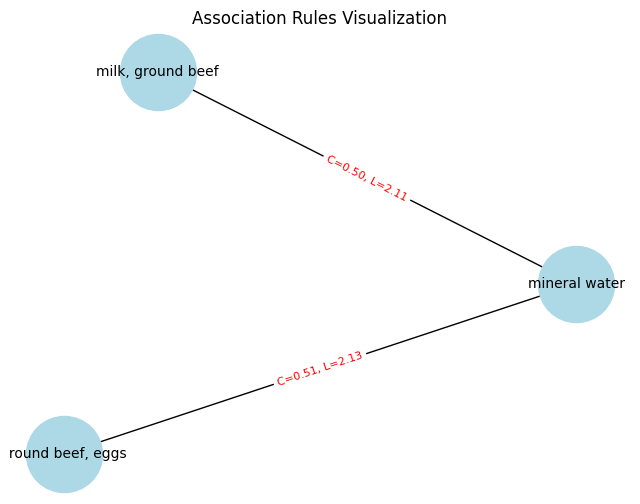

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
for idx, row in rules.iterrows():
    antecedent_str = ", ".join(list(row["antecedents"]))
    consequent_str = ", ".join(list(row["consequents"]))
    G.add_node(antecedent_str)
    G.add_node(consequent_str)
    
    G.add_edge(
        antecedent_str, 
        consequent_str, 
        confidence=row["confidence"], 
        lift=row["lift"]
    )

pos = nx.spring_layout(G, k=1, seed=42)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20)

nx.draw_networkx_labels(G, pos, font_size=10)

edge_labels = {
    (u, v): f'C={d["confidence"]:.2f}, L={d["lift"]:.2f}' 
    for u, v, d in G.edges(data=True)
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title("Association Rules Visualization")
plt.axis("off")
plt.show()


**Insights** - 
**Rule 1**: (milk, ground beef) → (mineral water)

Confidence ≈ 0.50: About half of the time when customers buy both milk and ground beef, they also buy mineral water.
Lift ≈ 2.11: Customers who purchase milk and ground beef together are more than twice as likely to also purchase mineral water compared to customers chosen at random.

**Rule 2**: (ground beef, eggs) → (mineral water)
Confidence ≈ 0.51: Roughly half the time when customers buy both ground beef and eggs, they also buy mineral water.
Lift ≈ 2.13: This indicates that mineral water is over twice as likely to be purchased when ground beef and eggs appear together, relative to chance alone.

**Takeaways:**
Customers who buy ground beef together with other staples (milk or eggs) are 50% likely to add mineral water to their carts, doubling the baseline probability of buying mineral water. This high lift and confidence suggests a strong association that can guide merchandising decisions, cross-promotions, and store layout optimizations.

**Result Suggestion:**

Mineral Water Tends to be Co-Purchased with Ground Beef (and Other Items)

Both rules involve ground beef in the antecedents and mineral water in the consequent.
This points to a possible affinity or habit in which people who plan to cook (e.g., a meal with ground beef, milk, or eggs) often also pick up mineral water.
Half of the Time is a Strong Signal

A 50% confidence means that whenever those item pairs are in the basket, there’s a good (one in two) chance mineral water is also included.
That’s a substantial correlation in a typical grocery dataset, especially if you see a lift above 2.0.
Promotional or Store Layout Opportunities

If you are a retailer, you might consider cross-promotions: e.g., display mineral water near the ground beef or egg/milk aisles to encourage bundling.
Advertisements or Bundling: For example, offering a discount on mineral water when customers buy ground beef and eggs might tap into the observed pattern.
